# Comparative Analysis of ARIMA, ANN and SVR (5)
###### Scenario 5 (SC5) contains hourly time-steps input data of the energy consumption for electric water boilers of 67 apartment daily consumption.

### Introduction 
In this study, a comparative analysis of machine learning models was conducted for the prediction and forecasting of EWBs energy consumption, using a dataset from 67 apartments as a case study. Subsequently, the input data was categorized into five distinct scenarios, serving as inputs to ANN, SVR, and ARIMA models to simulate their prediction and forecasting capabilities, evaluated using performance metrics presented in subsequent sections.

Scenario one will be used throughout this report for implementation, while the other scenarios will remain commented in the code and can be uncommented for estimation as needed. Figure 1 illustrates the implementation of this methodology.

<center>
<figure>
  <img src="method.jpg" width="70%" height="70%">
  <figcaption><i> Figure 1: Comparative analysis methodology </i></figcaption>
</figure>
</center>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.colors as mcolors
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from matplotlib.pyplot import rc
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf
import time

### Loading data time steps and data structuring for model application and visualisation ####

In [2]:
# Secanrio data 

flowload_data = pd.read_csv('electric_oneday.csv')  # daily consumption deframe data for 24houurs timestamp


total_time_len_day = 30 * 5   # prediction 

length_of_predict = 30  # future prediction (forecasting)

# data normalisation and training 
sample_data = flowload_data.iloc[:, -1] # 

datainf = flowload_data.iloc[:, -1].values  

datainf = datainf / np.max(datainf)

data_pass_to = [None, total_time_len_day, length_of_predict]

actual = datainf[:total_time_len_day + length_of_predict]


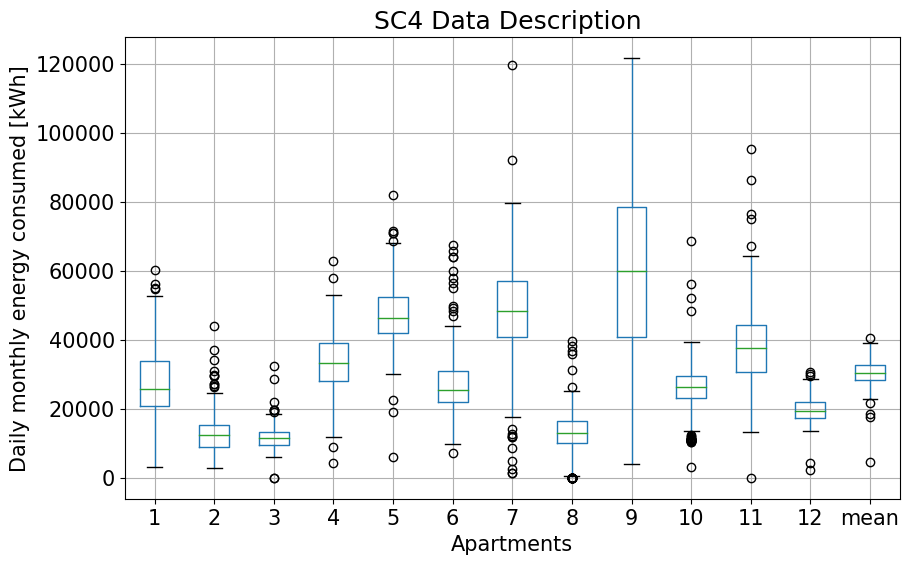

In [4]:
#  Data description visualisation plots
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv("electric_oneday.csv")


df_selected = df # training duration



# Directly rename the columns
df_selected.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mean']
#df_selected.set_axis(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mean'], axis='columns', inplace=True)


# visualisation 
rc('font', **{'size' : 15})
plt.figure(figsize=(10, 6)) 
df_selected.boxplot()  
plt.title('SC4 Data Description ')
#plt.xticks(rotation=45)  
plt.xlabel('Apartments')
plt.ylabel('Daily monthly energy consumed [kWh]')
plt.savefig('sc5_des.jpg')
plt.show()


#### ARIMA forecast and Prediction model development

#### Data Description of  other 4 secanrios, 
- Scenario 2 (SC2) as represent in figure 2, scenario 3 (SC3) as figure 3, scenario 4 (SC4) as figure 4, and scenario 5 (SC5) as  figure 5 respectively. the figures shoes the data descrpition of the data input time steps and means of the energy consumption for EWBs of 67 apartments. SC1 will be used for codel implememtataion other scenarios will be commented out while, other scenario codes are commented as below.

- Scenario 2 (SC2)

<center>
<figure>
  <img src="sc2_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 2: Scenario 2 (SC2) data description </i></figcaption>
</figure>
</center>


- Scenario 3 (SC3)

<center>
<figure>
  <img src="sc3_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 3: Scenario 3 (SC3) data description </i></figcaption>
</figure>
</center>


- Scenario 4 (SC4)

<center>
<figure>
  <img src="sc4_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 4: Scenario 4 (SC4) data description </i></figcaption>
</figure>
</center>


- Scenario 5 (SC5)

<center>
<figure>
  <img src="sc5_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 6: Scenario 5 (SC5) data description </i></figcaption>
</figure>
</center>


In [5]:
## ARIMA forecast and Prediction model development and analysis


#Computational time cost
start_time_arima_p = time.time()
start_time_arima_r = time.time()


## ARIMA model development
def arima_process(data, nhours, predict_len):
  
   
    kndata = data[:nhours]
    ukndata = data[nhours:nhours + predictlen]

    # Fitting the ARIMA model
    model = ARIMA(kndata, order=(3, 1, 0))
    fitted_model = model.fit()
    
    # prediction
    predict = fitted_model.predict(start=1, end=total_time_len_day)
    
    # Forecasting
    forecast = fitted_model.forecast(steps=predictlen)
    residuals = fitted_model.resid
    

    return kndata, ukndata, predict, forecast, residuals, fitted_model



nhours = total_time_len_day
predictlen = length_of_predict
kndata, ukndata, predict, forecast, residuals, fitted_model = arima_process(datainf, nhours, predictlen)


print(fitted_model.summary())



# computation time results
end_time_arima_p = time.time()
end_time_arima_r = time.time()
process_time_arima_p = end_time_arima_p - start_time_arima_p
process_time_arima_r = end_time_arima_r - start_time_arima_r
minute_arima_p = process_time_arima_p // 60 
minute_arima_r = process_time_arima_r // 60
second_arima_p = process_time_arima_p % 60 
second_arima_r = process_time_arima_r % 60 


# Computation time visualisation 
# prediction
print('Time Spent for arima_p: ', round(minute_arima_p), 'minutes', round(second_arima_p,3), 'seconds')

# forecasting time spent
print('Time Spent for arima_r: ', round(minute_arima_r), 'minutes', round(second_arima_r,3), 'seconds')


# Performance Metrics Evaluation 
# Prediction
r2_p = r2_score(kndata, predict)
rmse_p = np.sqrt(mean_squared_error(kndata, predict))
arima_mae_p = mean_absolute_error(kndata, predict)
mse_p = mean_squared_error(kndata, predict)


# forecasting
r2_r = r2_score(ukndata, forecast)
rmse_r = np.sqrt(mean_squared_error(ukndata, forecast))
arima_mae_r = mean_absolute_error(ukndata, forecast)
mse_r = mean_squared_error(ukndata, forecast)


# Print out metric results
# Prediction
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", arima_mae_p, "MSE:", mse_p)


# forecasting
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", arima_mae_r, "MSE:", mse_r)



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 152.496
Date:                Tue, 25 Mar 2025   AIC                           -296.992
Time:                        19:01:33   BIC                           -284.976
Sample:                             0   HQIC                          -292.110
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3385      0.095     -3.554      0.000      -0.525      -0.152
ar.L2         -0.2606      0.100     -2.600      0.009      -0.457      -0.064
ar.L3         -0.1463      0.088     -1.672      0.0

#### SVR forecasting and prediction model development

In [5]:
#svr model development

### Kernel function of SVR
start_time_svr_p = time.time()
start_time_svr_r = time.time()

def funck(x, y, kernel_type):
    # Gaussian Kernel
    if kernel_type == 'g':
        sigma = 0.0005   
        return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))
    return 0

#svr model development
def svr_process(datainf, data_pass_to, past_predict_len):
    nhour1 = data_pass_to[1]
    predictlen = data_pass_to[2]
    data = datainf
    datain = []

    for kl in range(nhour1 + predictlen):
        datain.append(data[kl:kl + 2])

    datain = np.array(datain) 
    
    datax = datain[:, :-1]
    datay = datain[:, -1]
    totlpt = len(datain)
    alpha = np.zeros(totlpt)
    norm1 = 10e2
    errortol = 0.2
    itercnt = 0
    maxiter = 10e2
    eps = 0.1

    while norm1 > errortol and itercnt < maxiter:
        alpha_old = alpha.copy()
        alpha_ = alpha.copy()

        for indxd in range(totlpt):
            gx = np.array([funck(datax[x], datax[indxd], 'g') for x in range(len(datax))])
            alpha[indxd] = alpha[indxd] + datay[indxd] - eps * np.sign(alpha[indxd]) - np.dot(alpha, gx)

            if alpha_[indxd] * alpha[indxd] < 0:
                alpha[indxd] = 0

        norm1 = np.linalg.norm(alpha_old - alpha)
        itercnt += 1

  

    outdata = np.array([alpha[indx2] * np.array([funck(datax[x], datax[indx2], 'g') for x in range(len(datax))]) for indx2 in range(totlpt)])
    outdataf = np.sum(outdata, axis=0)

    # Handle outdataf for non-array cases
    if not isinstance(outdataf, np.ndarray):
        outdataf = np.array([outdataf])

    # Past predictions
    past_predictions = outdataf[past_predict_len:nhour1] if past_predict_len < nhour1 else np.array([])
   

    # Future predictions
    resout = outdataf[nhour1:nhour1 + predictlen] if len(outdataf) > nhour1 else np.array([])

    kndata = datay[:nhour1]
    ukndata = datay[nhour1:nhour1 + predictlen]
    SVR_MSE = np.mean((ukndata - resout) ** 2) if resout.size > 0 else np.nan
    

    return kndata, ukndata, past_predictions, resout, SVR_MSE


# parameter predictions 
past_predict_len = 0 
kndata, ukndata, past_predictions, resout, svr_mse = svr_process(datainf, data_pass_to, past_predict_len)
end_time_svr_p = time.time()
end_time_svr_r = time.time()
process_time_svr_p = end_time_svr_p - start_time_svr_p
process_time_svr_r = end_time_svr_r - start_time_svr_r
minute_svr_p = process_time_svr_p // 60 
minute_svr_r = process_time_svr_r // 60
second_svr_p = process_time_svr_p % 60 
second_svr_r = process_time_svr_r % 60 

# Computation time visualisation 
# prediction
print('Time Spent for svr_p: ', round(minute_svr_p), 'minutes', round(second_svr_p,3), 'seconds')

# forecasting time spent
print('Time Spent for svr_r: ', round(minute_svr_r), 'minutes', round(second_svr_r,3), 'seconds')


# Performance Metrics Evaluation 
# Prediction
r2_p = r2_score(kndata, past_predictions)
rmse_p = np.sqrt(mean_squared_error(kndata, past_predictions))
svr_mae_p = mean_absolute_error(kndata, past_predictions)
mse_p = mean_squared_error(kndata, past_predictions)

## forecasting 
r2_r = r2_score(ukndata, resout)
rmse_r = np.sqrt(mean_squared_error(ukndata, resout))
svr_mae_r = mean_absolute_error(ukndata, resout)
mse_r = mean_squared_error(ukndata, resout)


# Print out metric results
# Prediction
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", svr_mae_p, "MSE:", mse_p)

# forecasting
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", svr_mae_r, "MSE:", mse_r)


Time Spent for svr_p:  2 minutes 40.967 seconds
Time Spent for svr_r:  2 minutes 40.967 seconds
prediction - R2 Score: -0.31138018517873034 RMSE: 0.09708870753041259 MAE: 0.09304501952089828 MSE: 0.009426217129925994
forecast - R2 Score: -1.341832459448359 RMSE: 0.09754321023195095 MAE: 0.09681559456073138 MSE: 0.009514677862354581


####  ANN Model Development

Epoch 1/200


C:\Users\alika\Documents\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0659 - mse: 0.0659
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0471 - mse: 0.0471 
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0349 - mse: 0.0349 
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215 - mse: 0.0215 
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0123 - mse: 0.0123 
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 - mse: 0.0085 
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - mse: 0.0073 
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - mse: 0.0062 
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - mse: 0.0059 
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - mse: 0.0056 
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mse: 0.0050 
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - mse: 0.0067 
Epoch 13/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.00

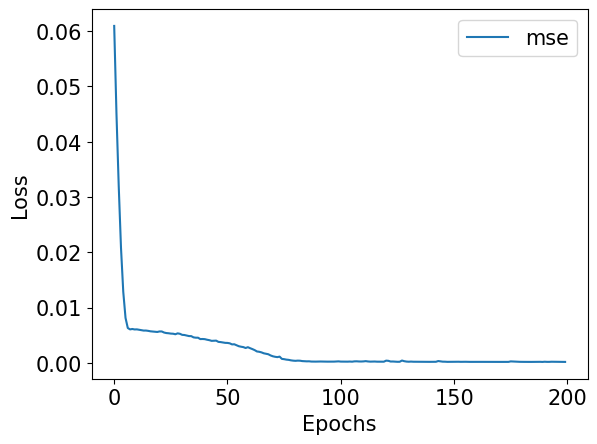

Time Spent for ann_p:  0 minutes 9.985 seconds
Time Spent for ann_r:  0 minutes 9.985 seconds
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Data - R2 Score: 0.9739622621938444 RMSE: 0.014154556240497764 MAE: 0.010485170304138548 MSE: 0.00020035146236541422
Test Data - R2 Score: 0.992942186467509 RMSE: 0.009964970636554136 MAE: 0.008401525803343574 MSE: 9.930063978738614e-05


In [6]:
### Training data

split_size = int(0.8 * len(flowload_data))

train_data = datainf[:split_size]
test_data = datainf[split_size:]




# ANN Prediction Model
# start time ANN
start_time_ann_p = time.time()
start_time_ann_r = time.time()

# model development
def ann_model(): 
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,))) 
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
 
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse']) 
    
    # es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,
    #         verbose=1, mode='auto', restore_best_weights=True,)
    history = model.fit(datainf, datainf, epochs=200)#, batch_size=30, callbacks=[es])
    
    return model, history
    

model, history = ann_model() 

pred = model.predict(datainf)

# prediction parameters
df = pd.DataFrame(history.history)
plt.plot(list(range(len(df.mse))), df.mse, label='mse')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


#Computational cost end time
end_time_ann_p = time.time()
end_time_ann_r = time.time()
process_time_ann_p = end_time_ann_p - start_time_ann_p
process_time_ann_r = end_time_ann_r - start_time_ann_r
minute_ann_p = process_time_ann_p // 60 
minute_ann_r = process_time_ann_r // 60
second_ann_p = process_time_ann_p % 60 
second_ann_r = process_time_ann_r % 60 

# print processing time ANN prediction
print('Time Spent for ann_p: ', round(minute_ann_p), 'minutes', round(second_ann_p,3), 'seconds')

# forecast
print('Time Spent for ann_r: ', round(minute_ann_r), 'minutes', round(second_ann_r,3), 'seconds')


# Performance Metrics Evaluation for Prediction
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()

# predictions metrics 
r2_train = r2_score(train_data, train_predictions)
rmse_train = np.sqrt(mean_squared_error(train_data, train_predictions))
ann_mae_train = mean_absolute_error(train_data, train_predictions)
mse_train = mean_squared_error(train_data, train_predictions)

# forecast metrics 
r2_test = r2_score(test_data, test_predictions)
rmse_test = np.sqrt(mean_squared_error(test_data, test_predictions))
ann_mae_test = mean_absolute_error(test_data, test_predictions)
mse_test = mean_squared_error(test_data, test_predictions)


# Print prediction metrics
print("Training Data - R2 Score:", r2_train, "RMSE:", rmse_train, "MAE:", ann_mae_train, "MSE:", mse_train)

# forecasting 
print("Test Data - R2 Score:", r2_test, "RMSE:", rmse_test,"MAE:", ann_mae_test, "MSE:", mse_test)



#### ARIMA Plots

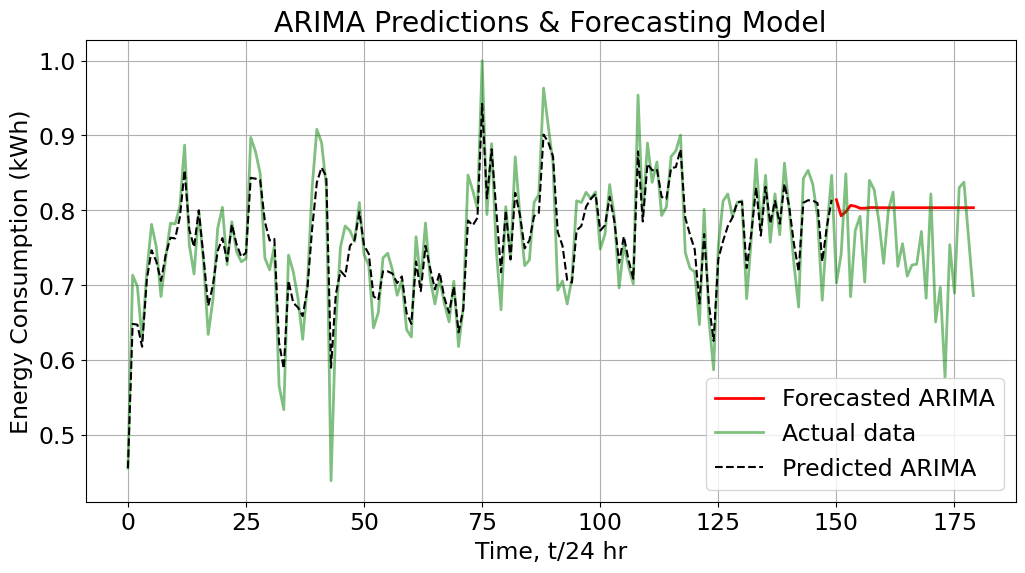

In [7]:
# Plotting All Results
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'r', label='Forecasted ARIMA', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.5, linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'black', label='Predicted ARIMA', linestyle='--')
plt.title('ARIMA Predictions & Forecasting Model')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
#plt.savefig('sc5_arima.jpg')
plt.show()

#### SVR plots

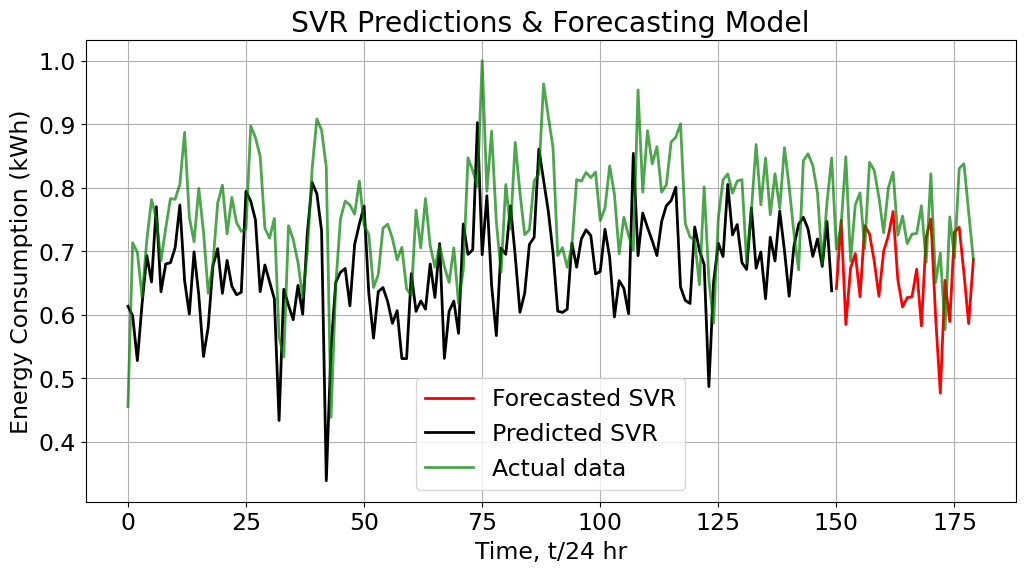

In [8]:
# Plotting
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', label='Forecasted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day)), past_predictions, 'black', label='Predicted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.title('SVR Predictions & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc5_svr.jpg')
plt.show()

#### ANN Model

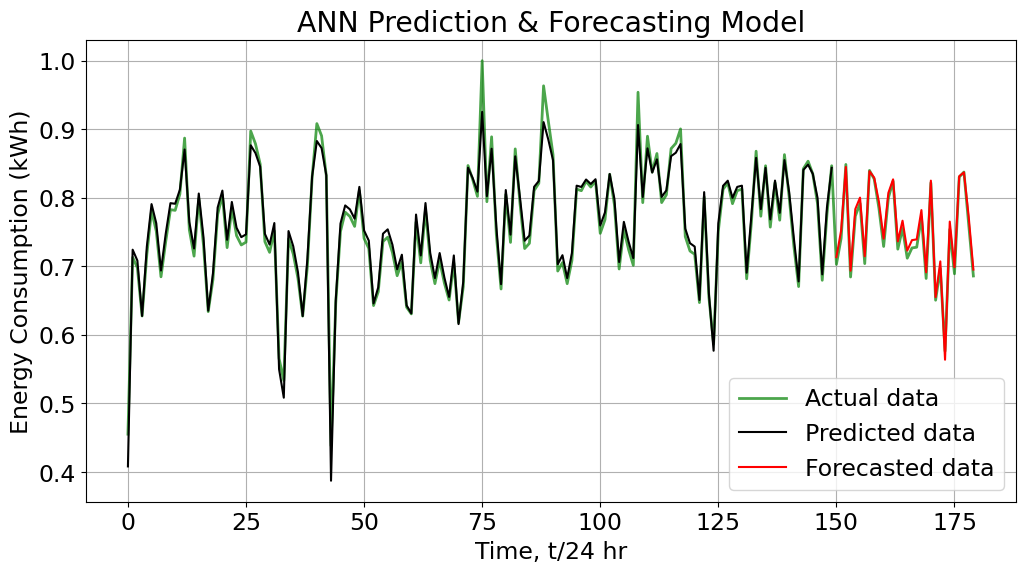

In [9]:
# Plotting Trained, Prediction & Forecast
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
#plt.plot(range(0, total_time_len_day), datainf[:total_time_len_day], 'g', label='Test data')
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
plt.plot(range(0, total_time_len_day), pred[:total_time_len_day], 'black', linestyle='-', label='Predicted data')
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'r', label='Forecasted data')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.title('ANN Prediction & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc5_ann.jpg')
plt.show()

### Comparison ARIMA, ANN & SVR predictions

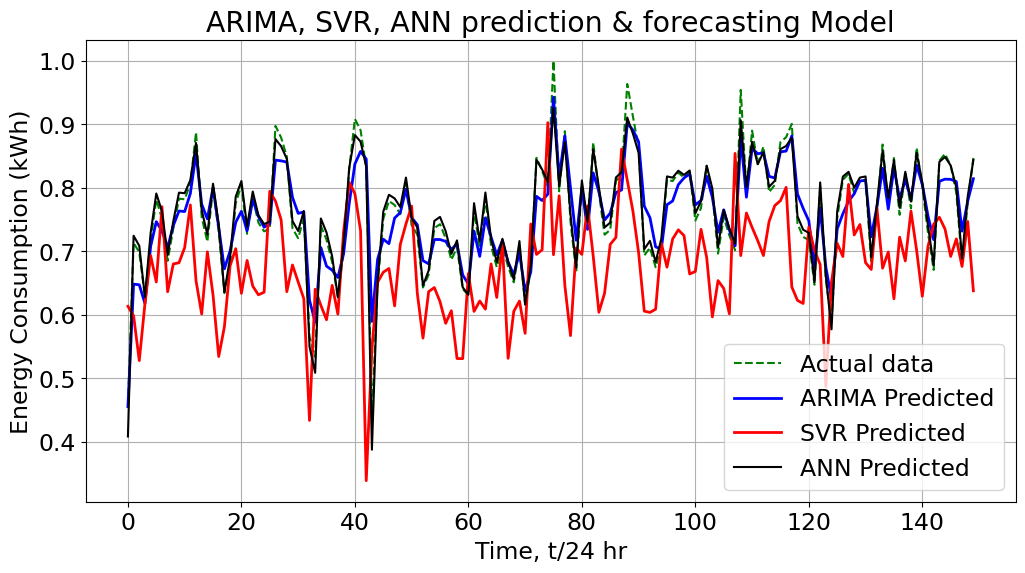

In [12]:
# Plotting All Results predictions
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(range(len(datainf[:total_time_len_day])), datainf[:total_time_len_day], 'g', label='Actual data', linestyle='--')
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'blue', label='ARIMA Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), past_predictions, 'r', label='SVR Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), pred[:total_time_len_day], 'black', linestyle='-', label='ANN Predicted')
plt.title('ARIMA, SVR, ANN prediction & forecasting Model')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
#plt.savefig('sc5_a_s_a.jpg')
plt.show()

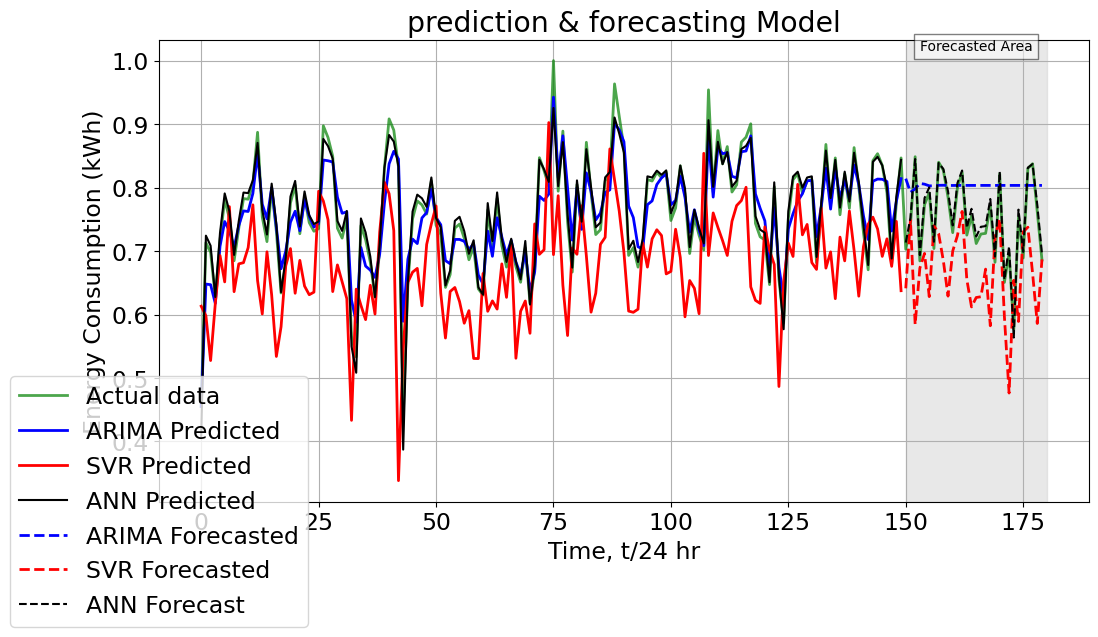

In [13]:
# Plotting All Results
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
# prediction plots
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'blue', label='ARIMA Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), past_predictions, 'r', label='SVR Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), pred[:total_time_len_day], 'black', linestyle='-', label='ANN Predicted')
#forecasting plots
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'blue', linestyle='--', label='ARIMA Forecasted', linewidth=2)
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', linestyle='--', label='SVR Forecasted', linewidth=2)
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'black', linestyle='--', label='ANN Forecast')
plt.axvspan(total_time_len_day, total_time_len_day + length_of_predict, color='lightgray', alpha=0.5)
x_position = total_time_len_day + (length_of_predict / 2)  
y_position = plt.ylim()[1] 
plt.text(x_position, y_position, 'Forecasted Area', ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.title('prediction & forecasting Model')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(loc='center', bbox_to_anchor = (0, 0))
plt.grid(True)
#plt.savefig('sc5_pf.jpg')
plt.show()
